In [1]:
import numpy as np
import cv2
from io import StringIO
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mylibrary as mylib
from mylibrary import euclidean_distance

%matplotlib inline

In [2]:
data_given = np.array([[5.9,3.2],
                 [4.6,2.9],
                 [6.2,2.8],
                 [4.7,3.2],
                 [5.5,4.2],
                 [5.0,3.0],
                 [4.9,3.1],
                 [6.7,3.1],
                 [5.1,3.8],
                 [6.0,3.0]])

In [3]:
class Center:
    def __init__(self, center, pts):
        self.center = center
        self.pts = pts
        
    def set_center(self, center):
        self.center = center
        
    def set_pts(self, pts):
        self.pts = pts
    
    def __eq__(self, other): 
        return np.all(self.center == other.center)
    
    def __repr__(self):
         return "cluster: " + str(self.center) 

In [4]:
def assign_to_center(data, centers, k):
    dis_matrix = np.empty((0,data.shape[0]))
    for center in centers:
        dis_matrix = np.vstack((dis_matrix, np.sum(np.square(data - center.center), axis=1)))
    belongs = np.argmin(dis_matrix, axis=0)
    for i in range(k):
        centers[i].pts = np.where(belongs == i)[0]
    return centers

In [5]:
def init_centers_random(data, k, seed=20):
    centers = data[np.random.RandomState(seed=seed).permutation(data.shape[0])[0:k]]
    centers = list(map(lambda x: Center(x,np.array([])), centers))
    centers = assign_to_center(data, centers,k)
    return centers

In [6]:
def init_given(data,k,seed):
    centers = np.array([[6.2,3.2],
              [6.6,3.7],
              [6.5,3.0]])
    centers = list(map(lambda x: Center(x,np.array([])), centers))
    centers = assign_to_center(data, centers,k)
    return centers

In [7]:
def update_centers(data, centers, k):
    not_updated = True
    new_centers = []
    for center in centers:
        new_centers.append(Center(np.mean(data[center.pts],axis=0), np.array([])))
    return assign_to_center(data,new_centers, k)   

In [8]:
def k_mean(data, k, init_fun, max_itr=500, seed=20, need_plot=False):
    itr = 0
    centers = init_fun(data,k,seed)
    while itr <= max_itr:
        itr += 1
        if need_plot:
            plot_k_min(data, centers, itr)
        if itr % 5 == 0:
            print("iteration :", itr)
        new_centers = update_centers(data,centers,k)
        centers_1 = np.asarray(list(map(lambda x: x.center ,centers)))
        centers_2 = np.asarray(list(map(lambda x: x.center ,new_centers)))
        if np.all(centers_1 == centers_2):
            break
        centers = new_centers 
    print("total iteration", itr)
    return centers

In [9]:
def plot_k_min(data, centers, itr):
    label_set = set(np.arange(len(centers)))
    color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    for label in label_set:
        index = centers[label].pts
        plt.scatter(data[index][:,0], data[index][:,1], s=20, c=color_map[label],
                    alpha=0.3, label=label)
        plt.scatter(centers[label].center[0], centers[label].center[1], s=100, c=color_map[label],
                    alpha=1.0, marker='x')
    plt.title("iteration: "+ str(itr))
    plt.legend(loc='best')
    plt.show()
    plt.close()

In [10]:
def plot_k_min(data, centers, itr):
    label_set = set(np.arange(len(centers)))
    #color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    color_map = dict(zip(label_set, ['red','green','blue']))
    for label in label_set:
        index = centers[label].pts
        plt.scatter(data[index][:,0], data[index][:,1], s=50, c=color_map[label],
                    alpha=0.3, label=label,marker='^')
        plt.scatter(centers[label].center[0], centers[label].center[1], s=50, color=color_map[label],
                    alpha=1.0, marker='o')
    plt.title("iteration: "+ str(itr))
    plt.legend(loc='best')
    plt.show()
    plt.close()

In [11]:
#data = mylib.generate_data()

total iteration 3


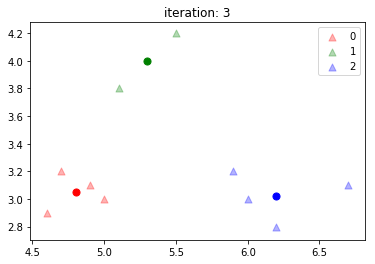

In [11]:
data = data_given
seed = 20
k = 3
max_itr = 100
itr = 0
centers = k_mean(data,k,init_fun=init_given ,need_plot=False)
plot_k_min(data,centers, 3)

### Color Quantization

In [12]:
def to_pixel_list(img):
    """
    Output:
        pixel_list: a list of pixel. value type float
    """
    pixel_list = np.empty((0,img[0].shape[1]))
    for row in img:
        pixel_list = np.append(pixel_list, row, axis=0)
    return pixel_list

In [13]:
def get_img(centers,shape):
    row_num, col_num, _ = img.shape
    new_img = np.empty((img.shape))
    for center in centers:
        pixel = center.center.astype(np.uint8)
        locs = list(map(lambda x: (int(x/col_num), int(x%col_num)) ,center.pts))
        for loc in locs:
            new_img[loc] = pixel
    return new_img.astype(np.uint8)

In [14]:
def quantized_img(img, k, init_fun = init_centers_random, max_itr=10000, seed=20):
    pixel_list = to_pixel_list(img)
    centers = k_mean(pixel_list, k, init_fun, max_itr=100000, seed=seed)
    return get_img(centers,img.shape)

### Test

In [15]:
img = cv2.imread("../data/baboon.jpg")

In [16]:
ks = [3,5,10,20]
for k in ks:
    print("k =",k)
    new_img = quantized_img(img,k)
    cv2.imwrite("../task3_img/task3_baboon_"+str(k)+".jpg",new_img)
    print()

iteration : 5
iteration : 10
iteration : 15
iteration : 20
iteration : 25
iteration : 30
total iteration 31
iteration : 5
iteration : 10
iteration : 15
iteration : 20
iteration : 25
iteration : 30
iteration : 35
total iteration 35
iteration : 5
iteration : 10
iteration : 15
iteration : 20
iteration : 25
iteration : 30
iteration : 35
iteration : 40
iteration : 45
iteration : 50
iteration : 55
iteration : 60
iteration : 65
iteration : 70
iteration : 75
iteration : 80
iteration : 85
iteration : 90
iteration : 95
iteration : 100
iteration : 105
iteration : 110
iteration : 115
iteration : 120
iteration : 125
iteration : 130
iteration : 135
iteration : 140
iteration : 145
total iteration 145
iteration : 5
iteration : 10
iteration : 15
iteration : 20
iteration : 25
iteration : 30
iteration : 35
iteration : 40
iteration : 45
iteration : 50
iteration : 55
iteration : 60
iteration : 65
iteration : 70
iteration : 75
iteration : 80
iteration : 85
iteration : 90
iteration : 95
iteration : 100
itera